<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Arka, Jinkun, Rawal, Rohan, Sheng-Yu

## Q3 Extract Text from Images (35 points, write-up)

**Please include all the answers to the write-up questions to HW3:PDF**. 
![](figures/annotatedLetters.jpg)
<center>Sample image with handwritten characters annotated with boxes around each character</center>

Now that you have a network that can recognize handwritten letters with reasonable accuracy, you can now use it to parse text in an image. Given an image with some text on it, our goal is to have a function that returns the actual text in the image. However, since your neural network expects a a binary image with a single character, you will need to process the input image to extract each character. There are various approaches that can be done so feel free to use any strategy you like.

Here we outline one possible method, another is that given in a [tutorial](http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html)
1. Process the image ([blur](http://scikit-image.org/docs/dev/auto_examples/filters/plot_denoise.html), [threshold](http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.try_all_threshold), [opening morphology](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.opening), etc. (perhaps in that order)) to classify all pixels as being part of a character or background.
2. Find connected groups of character pixels (see [skimage.measure.label](http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.label)). Place a bounding box around each connected component.
3. Group the letters based on which line of the text they are a part of, and sort each group so that the letters are in the order they appear on the page.
4. Take each bounding box one at a time and resize it to $32\times 32$, classify it with your network, and report the characters in order (inserting spaces when it makes sense).

Since the network you trained likely does not have perfect accuracy, you can expect there to be some errors in your final text parsing. Whichever method you choose to implement for the character detection, you should be able to place a box on most of there characters in the image. We have provided you with **01\_list.jpg**, **02\_letters.jpg**, **03\_haiku.jpg** and **04\_deep.jpg** to test your implementation on.

### Q3.1 (3 points, write-up)
The method outlined above is pretty simplistic, and makes several assumptions. What are two big assumptions that the sample method makes. In your writeup, include two example images where you expect the character detection to fail (either miss valid letters, or respond to non-letters).

<font color="red">**Please include your answer to HW3:PDF**</font>

### Q3.2 (13 points, write-up + code)
Find letters in the image. Given an RGB image, this function should return bounding boxes for all of the located handwritten characters in the image, as well as a binary black-and-white version of the image \texttt{im}. Each row of the matrix should contain **[y1,x1,y2,x2]** the positions of the top-left and bottom-right corners of the box. The black and white image should be floating point, 0 to 1, with the characters in black and background in white. 

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

In [53]:
import numpy as np

import skimage
import skimage.measure
import skimage.color
import skimage.restoration
import skimage.io
import skimage.filters
import skimage.morphology
import skimage.segmentation
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data, img_as_float
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
from skimage.color import rgb2gray
from skimage.restoration import denoise_tv_chambolle, estimate_sigma, denoise_bilateral
from skimage.morphology import square

# takes a color image
# returns a list of bounding boxes and black_and_white image
def findLetters(image):
    image = rgb2gray(image)
    image = img_as_float(image)
    est_noise = estimate_sigma(image, average_sigmas=True)
    # print("estimated noise = ", est_noise)
    denoised_img = denoise_tv_chambolle(image, weight=0.1)
    # denoised_img = denoise_bilateral(image, sigma_color=0.05, sigma_spatial=15)
    
    denoised_img = skimage.morphology.erosion(denoised_img, square(3))
    denoised_img = skimage.morphology.erosion(denoised_img, square(3))
    denoised_img = skimage.morphology.dilation(denoised_img)



    bboxes = []
    bw = None
    # insert processing in here
    # one idea estimate noise -> denoise -> greyscale -> threshold -> morphology -> label -> skip small boxes 
    # this can be 10 to 15 lines of code using skimage functions
    # YOUR CODE HERE

    # apply threshold
    thresh = threshold_otsu(denoised_img)
    bw = denoised_img > thresh

    # remove artifacts connected to image border
    # cleared = clear_border(bw)

    # label image regions
    label_image = label(1-bw)
    # to make the background transparent, pass the value of `bg_label`,
    # and leave `bg_color` as `None` and `kind` as `overlay`
    # image_label_overlay = label2rgb(label_image, image=denoised_img, bg_label=0)

    # fig, ax = plt.subplots(figsize=(10, 6))
    # ax.imshow(image_label_overlay, cmap="gray")

    for region in regionprops(label_image):
        # take regions with large enough areas
        if region.area >= 50:
            # draw rectangle around segmented coins
            minr, minc, maxr, maxc = region.bbox
            temp = [minr, minc, maxr, maxc]
            # print(temp)
            bboxes.append(temp)
    # # raise NotImplementedError()
    return bboxes, bw

In [35]:
import skimage
from skimage import io
image =skimage.io.imread('./images/02_letters.jpg')
findLetters(image)

([[15, 1694, 177, 1812],
  [21, 1482, 217, 1580],
  [43, 1228, 224, 1339],
  [61, 936, 254, 1067],
  [69, 622, 259, 763],
  [71, 408, 264, 525],
  [72, 162, 275, 266],
  [356, 1730, 544, 1863],
  [382, 1497, 525, 1609],
  [421, 1233, 554, 1356],
  [434, 958, 574, 1042],
  [435, 657, 595, 749],
  [446, 161, 620, 277],
  [454, 441, 600, 555],
  [684, 1727, 809, 1845],
  [688, 1478, 807, 1615],
  [693, 1242, 823, 1335],
  [715, 958, 848, 1052],
  [738, 677, 870, 804],
  [752, 456, 915, 538],
  [774, 154, 914, 268],
  [967, 1246, 1090, 1394],
  [990, 982, 1137, 1078],
  [1013, 721, 1140, 830],
  [1031, 439, 1170, 602],
  [1069, 158, 1203, 290],
  [1339, 2068, 1501, 2155],
  [1341, 2463, 1505, 2634],
  [1342, 2256, 1505, 2346],
  [1346, 1766, 1536, 1884],
  [1366, 1551, 1536, 1667],
  [1372, 1296, 1526, 1399],
  [1406, 1019, 1554, 1171],
  [1422, 771, 1565, 852],
  [1445, 478, 1601, 611],
  [1493, 196, 1644, 220]],
 array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  Tr

### Q3.3 (6 points, write-up + code)
Run `findLetters()` on all of the provided sample images in **images/**. Plot all of the located boxes on top of the image to show the accuracy of your `findLetters()` function. Include all the result images in your writeup.

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

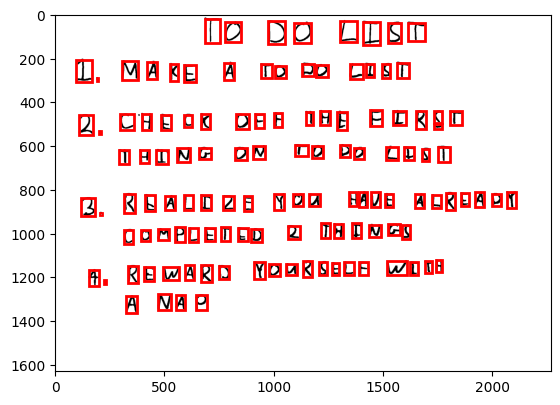

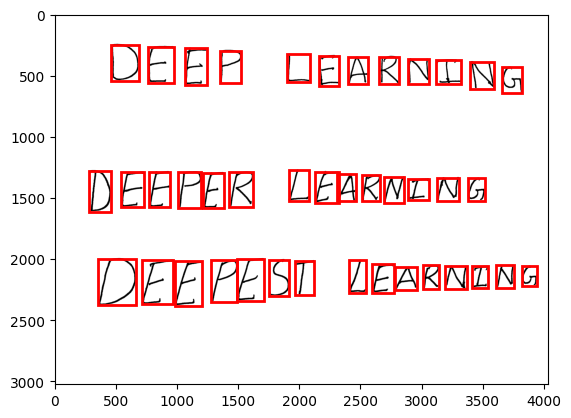

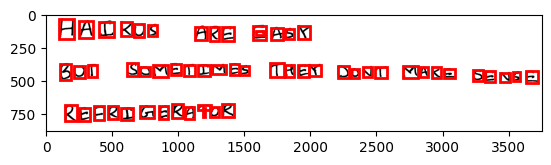

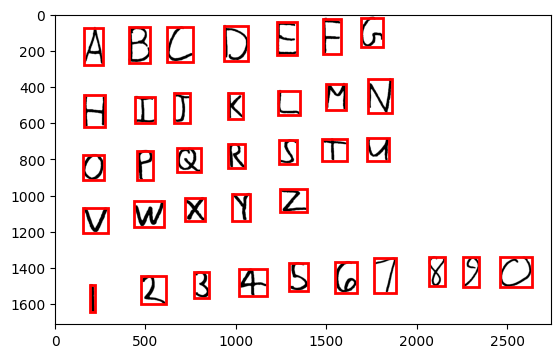

In [54]:
import skimage
import os
import matplotlib.pyplot as plt
import matplotlib.patches

from ipynb.fs.defs.q1 import *

# do not include any more libraries here!
# no opencv, no sklearn, etc!
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

for img in os.listdir('images'):
    im1 = skimage.img_as_float(skimage.io.imread(os.path.join('images',img)))
    bboxes, bw = findLetters(im1)

    plt.imshow(bw, cmap="gray")
    for bbox in bboxes:
        minr, minc, maxr, maxc = bbox
        rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
    plt.show()
    # find the rows using..RANSAC, counting, clustering, etc.
    # YOUR CODE HERE
    
    # raise NotImplementedError()
    # crop the bounding boxes
    # note.. before you flatten, transpose the image (that's how the dataset is!)
    # consider doing a square crop, and even using np.pad() to get your images looking more like the dataset
    # YOUR CODE HERE
    # raise NotImplementedError()

### Q3.4 (13 points, write-up + code)
Now you will load the image, find the character locations, classify each one with the network you trained in **Q2.1**, and return the text contained in the image. Be sure you try to make your detected images look like the images from the training set. Visualize them and act accordingly. 

<font color="red">**Please include your answer to HW3:PDF**</font>

<font color="red">**For this question, please also submit screenshot of your code snippets to the write-up**</font>

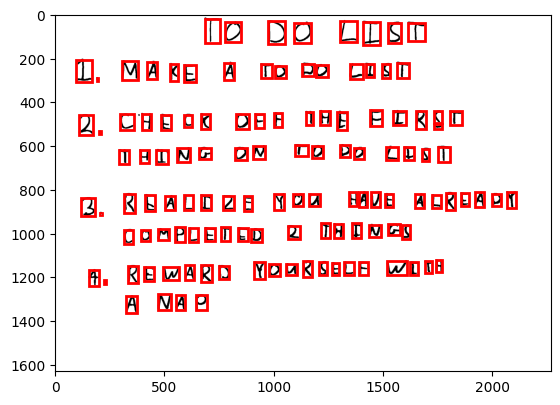

T0C0LIS
IXM1XEAT0D0LIST
IXTCHHIENCKG0OENETJOHIO0FEIXRSTHTT
3XCRO8MAYEEIETZ2EDY2OUT4HIAVNEFSALREADY
5X8EWXRDY0URSELFWITA
ANAP


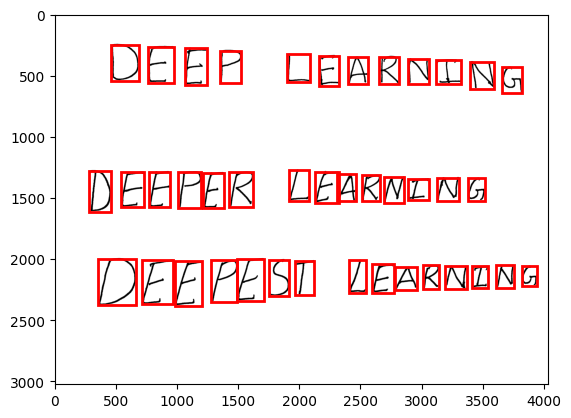

EF9LEARMING
CEP9ERLEAR5ING
C5CPEST1EARNING


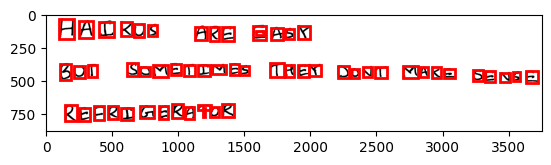

HAIKUSAREEASY
EUTSOMETIMESTREYDONTMAK2SENSE
REFRIGERA1M0R


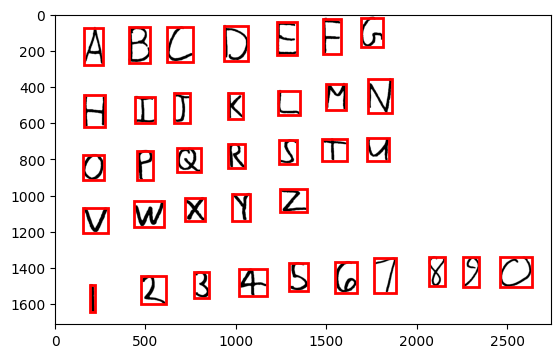

2BCDEP
HIIKLMN
0PQRSTU
VWXYZ
1Z3FSG787C


In [64]:
# load the weights
# run the crops through your neural network and print them out
import skimage
import skimage.io
import pickle
import string
import numpy as np

letters = np.array([_ for _ in string.ascii_uppercase[:26]] + [str(_) for _ in range(10)])
params = pickle.load(open('q2_weights.pickle','rb'))
# YOUR CODE HERE
for img in os.listdir('images'):
    im1 = skimage.img_as_float(skimage.io.imread(os.path.join('images',img)))
    bboxes, bw = findLetters(im1)

    plt.imshow(bw, cmap="gray")
    for bbox in bboxes:
        minr, minc, maxr, maxc = bbox
        rect = matplotlib.patches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
    plt.show()

    sorted_temp = sorted(bboxes, key = lambda x:x[2])
    lines = 1
    max_chars_in_line = 0
    chars_in_line = 0
    # for i in range(1,len(sorted_temp)):
    #     if abs(sorted_temp[i-1][2] - sorted_temp[i][2]) > 100:
    #         # Append in the next row of sorted y
    #         lines += 1
    #         max_chars_in_line = max(chars_in_line, max_chars_in_line)
    #         chars_in_line = 0
    #     # sorted_y[x][y] = sorted_temp[i]
    #     chars_in_line += 1

    sorted_lines = []

    # print("lines = ", lines)
    # print("max cchars in line = ", max_chars_in_line)
    # sorted_lines = np.ones((lines, max_chars_in_line, 4))*np.nan
    curr_line = 0
    curr_char_idx = 0
    chars_in_one_line = []
    for j in range(1,len(sorted_temp)):
        if abs(sorted_temp[j-1][2] - sorted_temp[j][2]) > 100:
            sorted_lines.append(chars_in_one_line)
            chars_in_one_line = []
            curr_line += 1
            curr_char_idx = 0
        # print("currline = ", curr_line)
        # print("len = ", len(sorted_temp))
        chars_in_one_line.append(sorted_temp[j])
        curr_char_idx += 1

    sorted_lines.append(chars_in_one_line)

    for k in range(len(sorted_lines)):
        sorted_lines[k] = sorted(sorted_lines[k], key = lambda x:x[3])

    for i in sorted_lines:
        for j in i:
            patch = bw[j[0]:j[2],j[1]:j[3]]
            # plt.imshow(patch, cmap='gray')
            patch_ht = patch.shape[0]
            patch_wdt = patch.shape[1]
            pad_with = patch_ht-patch_wdt
            if pad_with > 0:
                patch = np.pad(patch, ((0,0),(pad_with//2, pad_with//2)), mode='constant', constant_values =1)
            elif pad_with < 0:
                patch = np.pad(patch, ((-pad_with//2, -pad_with//2),(0,0)), mode='constant', constant_values =1)

            patch = np.pad(patch, ((25,25),(25,25)), mode='constant', constant_values =1)
            patch = skimage.morphology.erosion(patch)
            patch = skimage.transform.resize(patch, (32,32))
            # plt.imshow(patch, cmap='gray')
            patch = patch.transpose()

            # plt.show()
            patch = patch.reshape(1,1024)
            post_act = forward(patch,params,'layer1',sigmoid)
            pred_output = forward(post_act,params,'output',softmax)
            pred_idx = np.argmax(pred_output[0])
            detected_char = letters[pred_idx]
            print(detected_char, end='')
            # break
        # break
        print('')
    # break
        
    
# raise NotImplementedError()

In [30]:
lis = [[[1,4],[3,6],[2,59]]]
lis = np.array(lis)
lis[0][1] = [9,9]
print(lis[0])
lis = sorted(lis, key=lambda x: x[0])
print(lis)

[[ 1  4]
 [ 9  9]
 [ 2 59]]
[array([[ 1,  4],
       [ 9,  9],
       [ 2, 59]])]


In [22]:
import numpy as np
a = np.zeros((3,3))
a[1] = 2
print(a)

[[0. 0. 0.]
 [2. 2. 2.]
 [0. 0. 0.]]
